# Time Series Exploratory Analysis — Demand Forecasting

This notebook explores historical demand patterns for a single product-store combination.
The goal is to understand trend, seasonality, and variability in demand before building
forecasting models.

Understanding these patterns helps in selecting appropriate forecasting approaches and
avoiding modeling assumptions that do not fit the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("default")

## Load and Prepare Data

We focus on a single store-item pair to keep the analysis interpretable and aligned with
real-world forecasting scenarios where models are often built per product.

In [2]:
# Load raw data
df = pd.read_csv("../data/raw/store_item_demand.csv")

# Select a single store-item combination
df = df[(df["store"] == 1) & (df["item"] == 1)]

# Convert date column and sort
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")

df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


## Initial Time Series Overview

We begin by visualizing daily demand over time to identify:
- Overall trend
- Seasonal patterns
- Volatility and anomalies

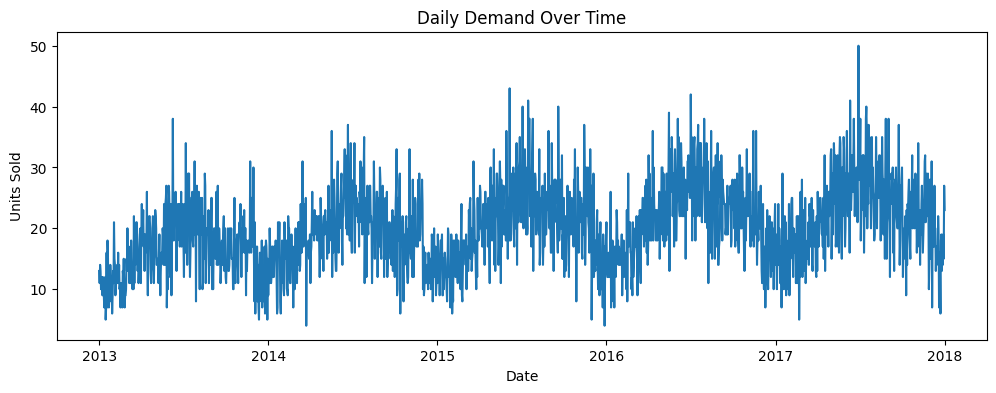

In [3]:
plt.figure(figsize=(12, 4))
plt.plot(df["date"], df["sales"])
plt.title("Daily Demand Over Time")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()

## Trend Analysis Using Rolling Average

A rolling average helps smooth short-term fluctuations and highlights
longer-term demand trends.

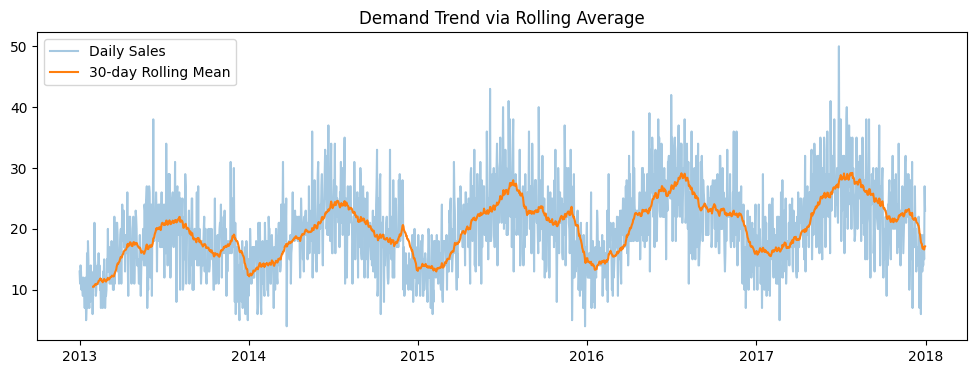

In [4]:
df["rolling_30"] = df["sales"].rolling(window=30).mean()

plt.figure(figsize=(12, 4))
plt.plot(df["date"], df["sales"], alpha=0.4, label="Daily Sales")
plt.plot(df["date"], df["rolling_30"], label="30-day Rolling Mean")
plt.legend()
plt.title("Demand Trend via Rolling Average")
plt.show()

## Weekly Seasonality Check

Demand often varies by day of the week in retail settings.
We examine average demand by weekday to detect recurring weekly patterns.

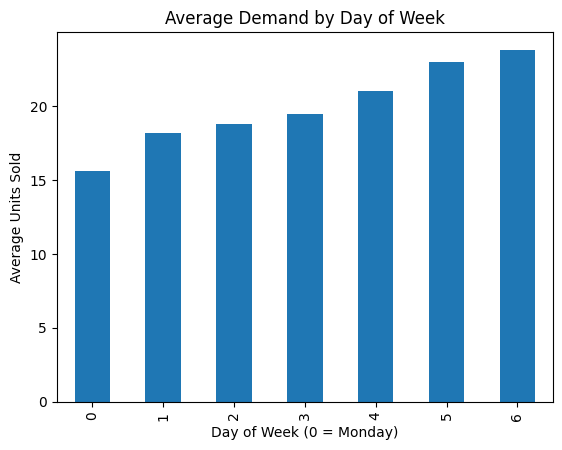

In [5]:
df["day_of_week"] = df["date"].dt.dayofweek

df.groupby("day_of_week")["sales"].mean().plot(
    kind="bar",
    title="Average Demand by Day of Week"
)
plt.xlabel("Day of Week (0 = Monday)")
plt.ylabel("Average Units Sold")
plt.show()

## Monthly Demand Aggregation

Aggregating demand monthly helps reveal longer-term trends
and reduces daily noise in the data.

/tmp/ipykernel_8931/3571239339.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


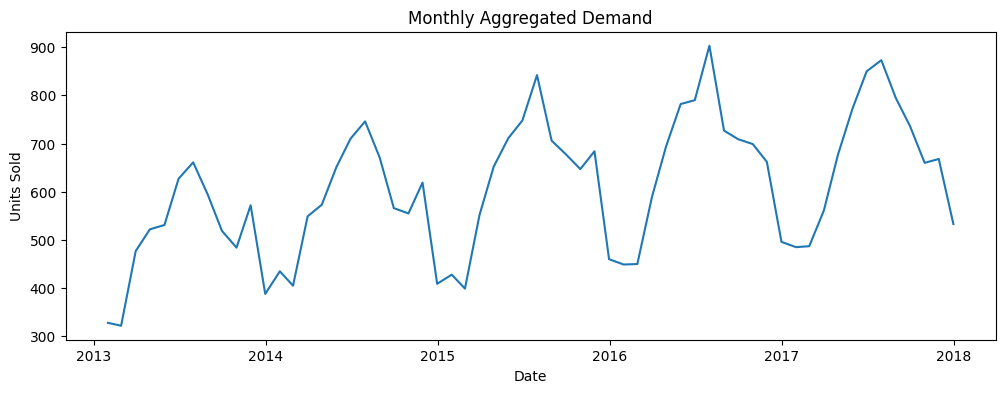

In [6]:
monthly_demand = (
    df.set_index("date")["sales"]
      .resample("M")
      .sum()
)

plt.figure(figsize=(12, 4))
plt.plot(monthly_demand)
plt.title("Monthly Aggregated Demand")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()

## Key Observations

- Demand exhibits a stable long-term pattern with noticeable short-term variability.
- Weekly seasonality is present, indicating recurring demand cycles.
- Rolling averages help smooth volatility and reveal underlying trends.
- Aggregated monthly demand highlights broader movement that may not be visible daily.

## Implications for Forecasting

- Time-based train-validation splits are required to avoid data leakage.
- Seasonality-aware forecasting models are likely to outperform naive baselines.
- Rolling averages provide a reasonable short-term benchmark.
- Forecast evaluation should consider both accuracy and business impact.